In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import segmentation_models as sm
import tensorflow as tf
from tensorflow.keras.metrics import MeanIoU
import random

sm.set_framework('tf.keras')
sm.framework()

from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from tensorflow.keras.utils import to_categorical

from keras.utils.vis_utils import plot_model

from sklearn import metrics

import math
import pandas as pd

import seaborn as sns

import ast

Segmentation Models: using `keras` framework.


In [92]:
def preprocess_data(img, mask, num_class):
    #Scale images
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    mask = to_categorical(mask, num_class)
      
    return (img,mask)

In [93]:
train_files_index = None

In [94]:
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip = False,
                      vertical_flip = False,
                      fill_mode = None)
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        shuffle = False,
        target_size = (64, 64),
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        shuffle = False,
        target_size = (64, 64),
        color_mode = 'grayscale',
        batch_size = batch_size,
        seed = seed)
    
    # print(type(image_generator.filenames), type(mask_generator.filenames))
    # print(image_generator.filenames[:30])
    # train_files_index = list(image_generator.filenames)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [95]:
seed = 24
batch_size = 1
n_classes = 8

In [96]:
model_names = ['Unet-resnet50', 'Unet-resnet101', 'Unet-resnet152']
models_path = '/home/shrayank_mistry/Modules/current_models/model_stats/'

In [97]:
models = []
for m in model_names:
    md = m.split('-')[0]
    bk = m.split('-')[1]

    models.append(load_model(models_path + f'{md}_{bk}/model.hdf5', compile = False))

In [2]:
test_img_path = '/home/shrayank_mistry/Modules/data_v2/test_images/'
test_msk_path = '/home/shrayank_mistry/Modules/data_v2/test_masks/'

test_images = os.listdir(test_img_path + 'test/')
test_masks = os.listdir(test_msk_path + 'test/')

test_images.sort()
test_masks.sort()

In [3]:
print(len(test_images), len(test_masks))

55917 55917


In [100]:
test_img_gen = trainGenerator(test_img_path, test_msk_path, num_class = n_classes)
test_image_batch, test_mask_batch = test_img_gen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis = 3) 
test_pred_batch = model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis = 3)

Found 55917 images belonging to 1 classes.
Found 55917 images belonging to 1 classes.


In [4]:
train_files_index = [str(i) for i in range(1, len(test_images) + 1)]

In [5]:
train_files_index.sort()

In [103]:
model = models[2]

In [104]:
test_img_gen = trainGenerator(test_img_path, test_msk_path, num_class = n_classes)
predicted_path = '/home/shrayank_mistry/Modules/data_v2/predicted_masks/'

for i in range(len(train_files_index)):

    test_image_batch, test_mask_batch = test_img_gen.__next__()

    test_mask_batch_argmax = np.argmax(test_mask_batch, axis = 3) 
    test_pred_batch = model.predict(test_image_batch)
    test_pred_batch_argmax = np.argmax(test_pred_batch, axis = 3)

    img = test_pred_batch_argmax[0]
    cv2.imwrite(f'{predicted_path}{int(train_files_index[i])}.png', img)
    

Found 55917 images belonging to 1 classes.
Found 55917 images belonging to 1 classes.


In [105]:
import cv2
import numpy as np

img = test_pred_batch_argmax[2]

cv2.imwrite("filename.png", img)

IndexError: index 2 is out of bounds for axis 0 with size 1

In [ ]:
arr = cv2.imread('/home/shrayank_mistry/Modules/filename.png', cv2.IMREAD_UNCHANGED)

In [6]:
file_names = [i for i in range(1, len(test_images) + 1)]

In [ ]:
arr = cv2.imread('/home/shrayank_mistry/Modules/data_v2/predicted_masks/1.png', cv2.IMREAD_UNCHANGED)

In [ ]:
arr

array([[2, 1, 1, ..., 5, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 5, 5, 5],
       [1, 1, 1, ..., 5, 5, 5],
       [1, 1, 1, ..., 5, 5, 5]], dtype=uint8)

In [7]:
R = 10944
C = 20928
index = 0

main_arr = np.zeros((R, C))
y = 0

for i in range(327):
    x = 0
    for j in range(171):
        path = f'/home/shrayank_mistry/Modules/data_v2/predicted_masks/{file_names[index]}.png'
        # arr = cv2.imread(f'/home/shrayank_mistry/Modules/{file_names[index]}.png', cv2.IMREAD_UNCHANGED)

        arr = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        # print(arr)
        a = 0

        for m in range(x, x + 64):
            b = 0
            for n in range(y, y + 64):
                main_arr[m][n] = arr[a][b]
                b = b + 1
            a = a + 1
        x = x + 64
        # print(path)
        index = index + 1
    y = y + 64

In [8]:
# main_msk = cv2.imread('/home/shrayank_mistry/Modules/data_v2/mask.tif', cv2.IMREAD_UNCHANGED)

from osgeo import gdal

dataset = gdal.Open('/home/shrayank_mistry/Modules/data_v2/mask.tif', gdal.GA_ReadOnly)
for x in range(1, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(x)
    main_msk = band.ReadAsArray(0)

main_msk = main_msk.T
main_msk = main_msk[:R, :C]
print(main_msk.shape)

(10944, 20928)


In [9]:
np.unique(main_msk)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int16)

In [10]:
m_arr = np.array(main_arr, dtype = 'int')
np.unique(m_arr)

array([1, 2, 3, 4, 5, 6, 7])

In [11]:
# correct = main_msk == main_arr
correct = main_msk == m_arr

In [12]:
pixel_acc = []
pixel_acc.append(float(correct.sum() / (correct.shape[0] * correct.shape[1])))

In [13]:
print(f'Max Pixel Accuracy = {np.max(pixel_acc)}, Mean Pixel Accuracy = {np.mean(pixel_acc)}')

Max Pixel Accuracy = 0.41445801418704287, Mean Pixel Accuracy = 0.41445801418704287


In [16]:
import matplotlib.colors
# 7 colors
# [Water, DenseForest, SparseForest, BarrenLand, UrbanLand, FarmLand, FallowLand]
# [#0033cc, #006600, #33cc33, #663300, #5200cc, #ffcc00, #e68a00]
cp_main = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#000000', '#0033cc', '#006600', '#33cc33', '#663300', '#5200cc', '#ffcc00', '#e68a00'])
cp_pred = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#0033cc', '#006600', '#33cc33', '#663300', '#5200cc', '#ffcc00', '#e68a00'])

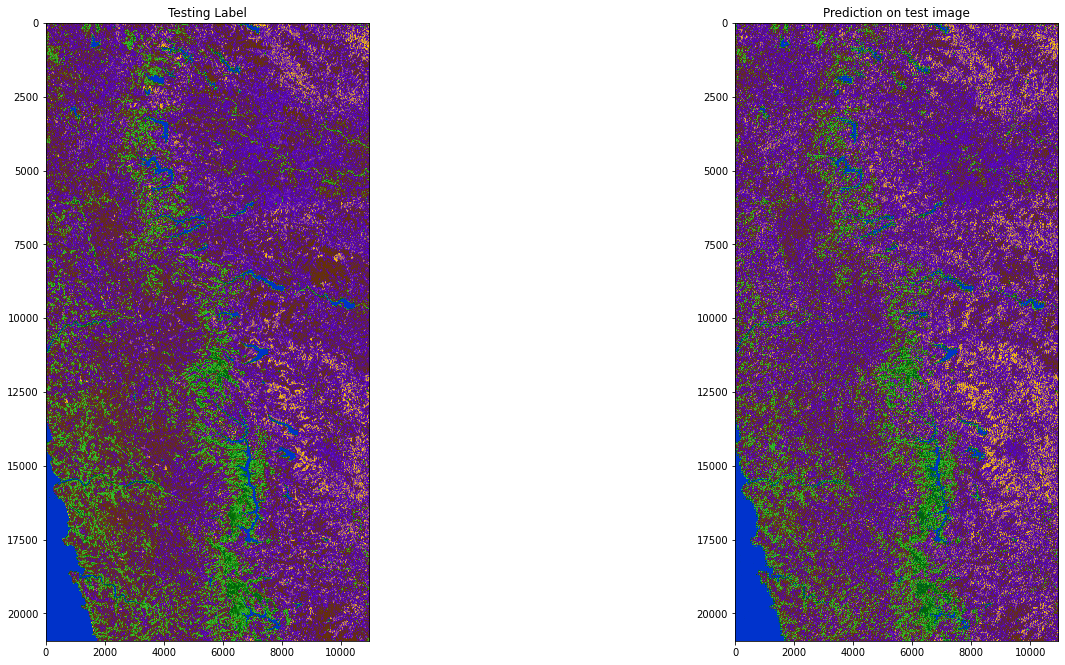

In [17]:
plt.figure(figsize=(35, 25))
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(main_msk.T, cmap = cp_main)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(main_arr.T, cmap = cp_pred)
plt.show()

In [18]:
print(main_msk.shape, main_arr.shape)

(10944, 20928) (10944, 20928)


In [19]:
cs = 8
confusion_matrix = np.zeros((cs, cs), dtype = 'int')

target = main_msk
prediction = main_arr   

r = target.shape[0]
c = target.shape[1]

for i in range(r):
    for j in range(c):
        target_pixel = target[i][j]
        predict_pixel = int(prediction[i][j])
        
        
        confusion_matrix[predict_pixel][target_pixel] += 1

In [20]:
classes = ['Unclassified', 'Water', 'DenseForests', 'SparseForests', 'BarrenLand', 'UrbanLand', 'FarmLand', 'FallowLand']
# headers = ['Precision', 'Recall', 'Overall-Accuracy', 'F1-Score', 'MCC']


headers = ['Precision', 'Recall', 'Overall-Accuracy', 'F1-Score']

metrics = {}
for c in range(1, len(classes)):
    tp, fn, fp, tn = 0, 0, 0, 0

    p, r, o, f, m = 0, 0, 0, 0, 0

    # True Positive
    tp = confusion_matrix[c][c]
    
    # False Negative
    for i in range(len(classes)):
        if i == c: continue
        fn += confusion_matrix[c][i]
    
    # False Positive
    for i in range(len(classes)):
        if i == c: continue
        fp += confusion_matrix[i][c]
    
    # True Negative
    for i in range(len(classes)):
        if i == c: continue
        for j in range(len(classes)):
            if j == c: continue

            tn += confusion_matrix[i][j]
    
    print(f'Class {c}, Metrics = [TP {tp}, FN {fn}, FP {fp}, TN {tn}]')

    p = tp / (tp + fp)
    r = tp / (tp + fn)
    o = (tp + tn) / (tp + fp + tn + fn)
    f = (2 * tp) / ((2 * tp) + (fp + fn))
    # m = ((tp * tn) - (fp * fn)) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))

    # print(((tp * tn) - (fp * fn)) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))))
    # print((math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))))

    # metrics[classes[c]] = [p, r, o, f, m]
    metrics[classes[c]] = [p, r, o, f]

Class 1, Metrics = [TP 9454622, FN 5083918, FP 4321092, TN 210176400]
Class 2, Metrics = [TP 2412204, FN 7262902, FP 5128832, TN 214232094]
Class 3, Metrics = [TP 11820305, FN 23527733, FP 27673852, TN 166014142]
Class 4, Metrics = [TP 56266067, FN 37570165, FP 47353468, TN 87846332]
Class 5, Metrics = [TP 1963462, FN 7393914, FP 8442606, TN 211236050]
Class 6, Metrics = [TP 2329535, FN 16803372, FP 11792404, TN 198110721]
Class 7, Metrics = [TP 10679624, FN 36468209, FP 29391054, TN 152497145]


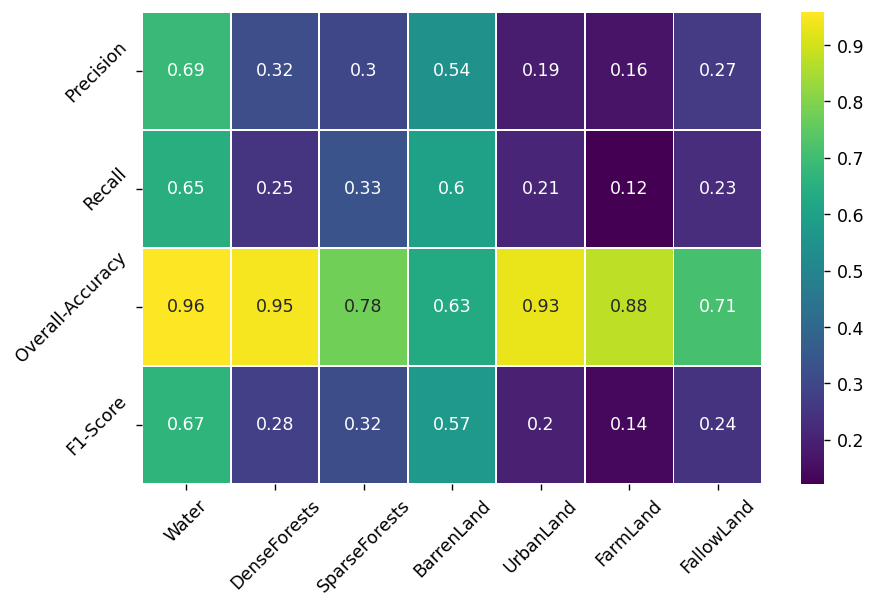

In [21]:
df = pd.DataFrame(metrics, index = headers)
plt.figure(figsize = (8, 5), dpi = 125)
sns.heatmap(data = df, annot = True, linewidths = 0.5, 
        cmap = 'viridis');

plt.yticks(rotation = 45);
plt.xticks(rotation = 45);